In [2]:
import pandas as pd

# Load the 'diabetes.csv' dataset
df = pd.read_csv('/content/diabetes.csv')

# Display the first few rows of the DataFrame
print('First 5 rows of the dataset:')
print(df.head())

# info
df.info()

# Generate descriptive statistics for numerical columns
print(df.describe())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   

**Reasoning**:
Now that the data has been loaded and its basic structure and statistics are understood, the next step is to create initial visualizations. This includes histograms for all numerical features to visualize their distributions, as specified in the subtask instructions.



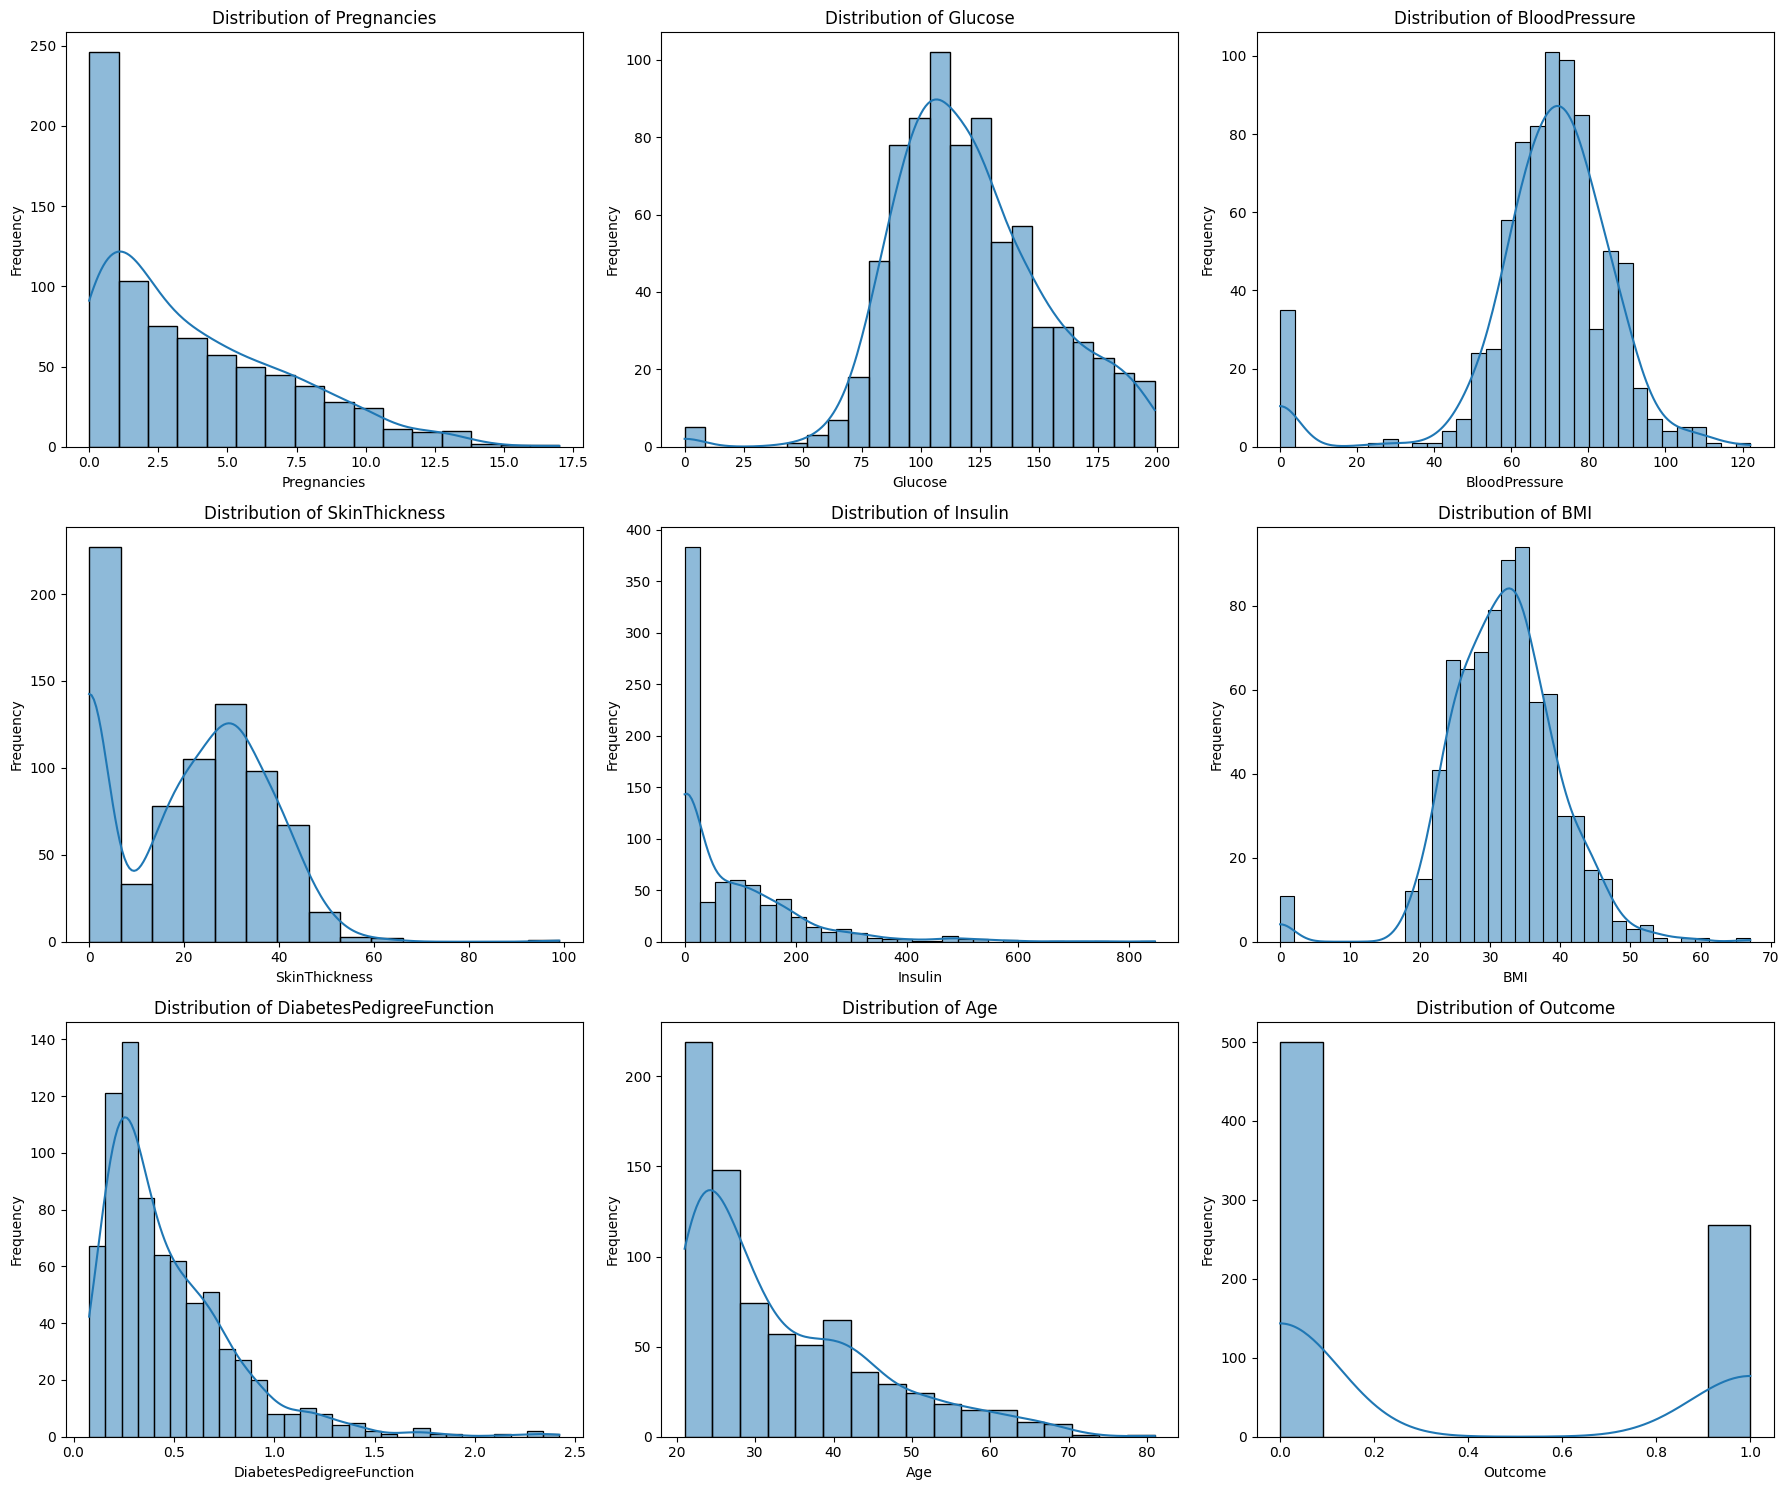

Histograms for all numerical features displayed.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for all numerical features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
print("Histograms for all numerical features displayed.")

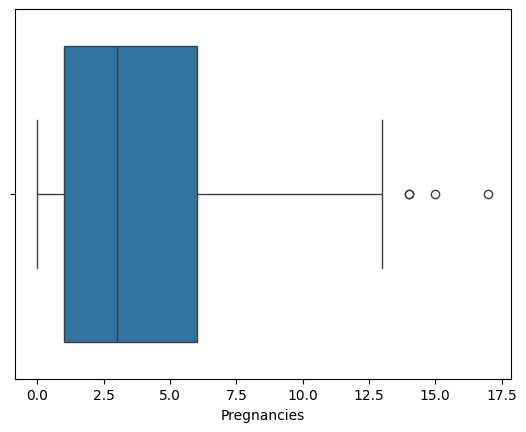

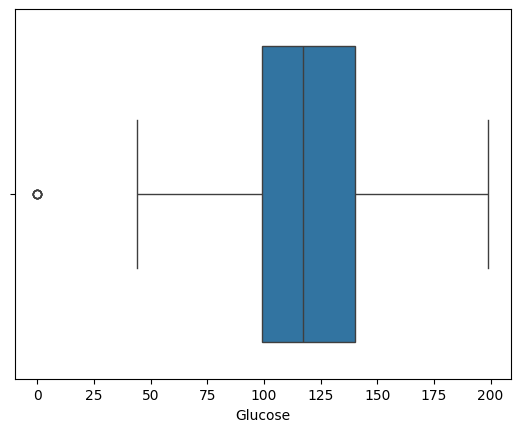

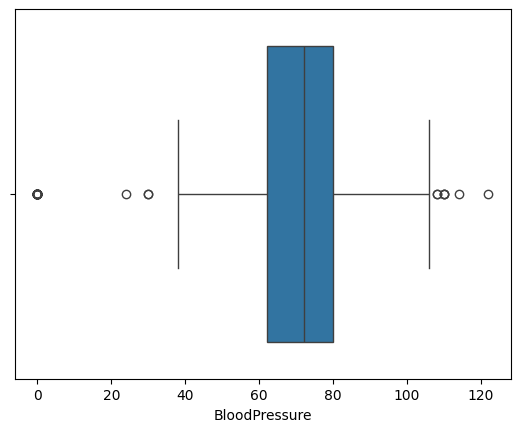

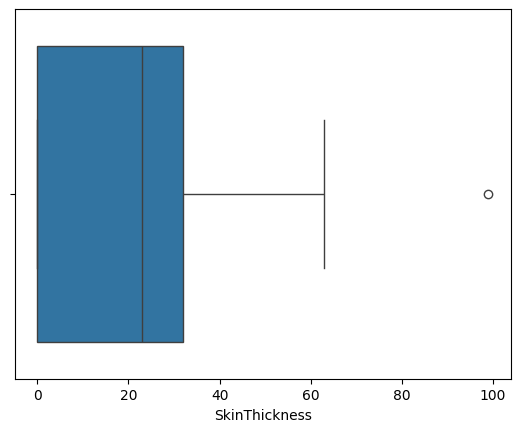

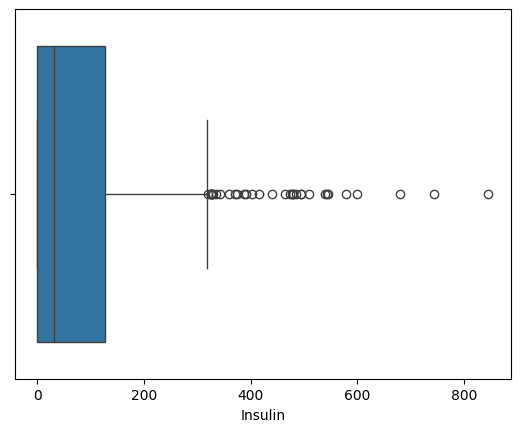

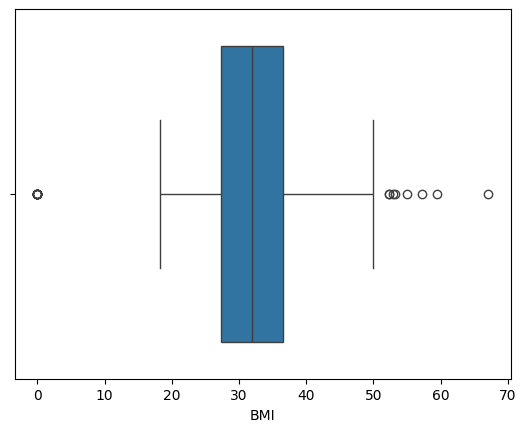

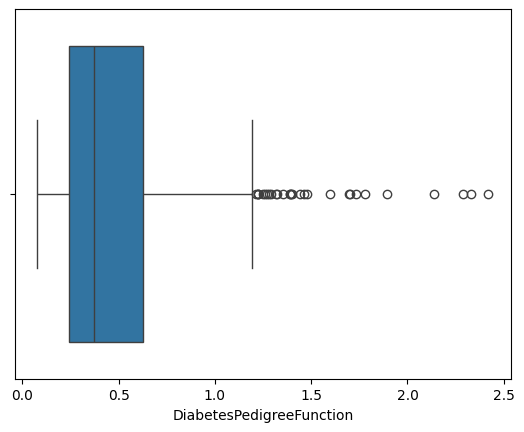

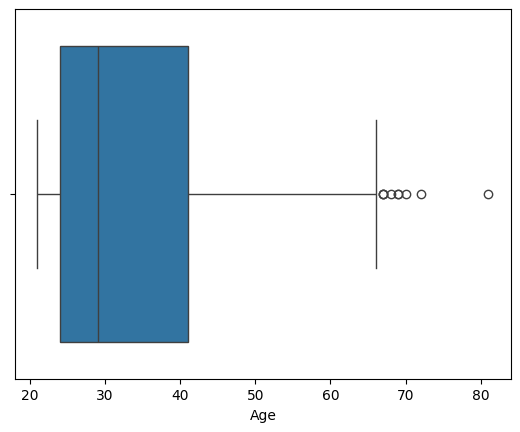

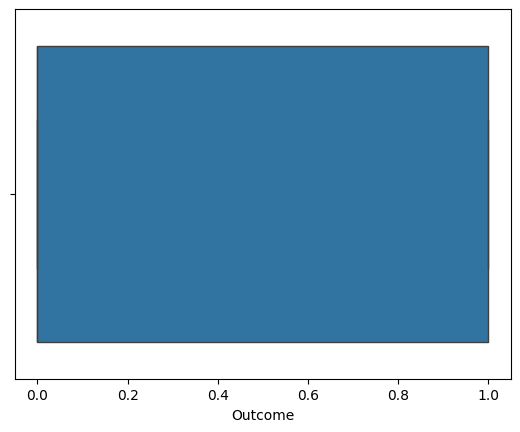

Box plots for key numerical features displayed.


In [4]:
for col in df.columns:
  sns.boxplot(data=df, x=col)
  plt.show()
print("Box plots for key numerical features displayed.")

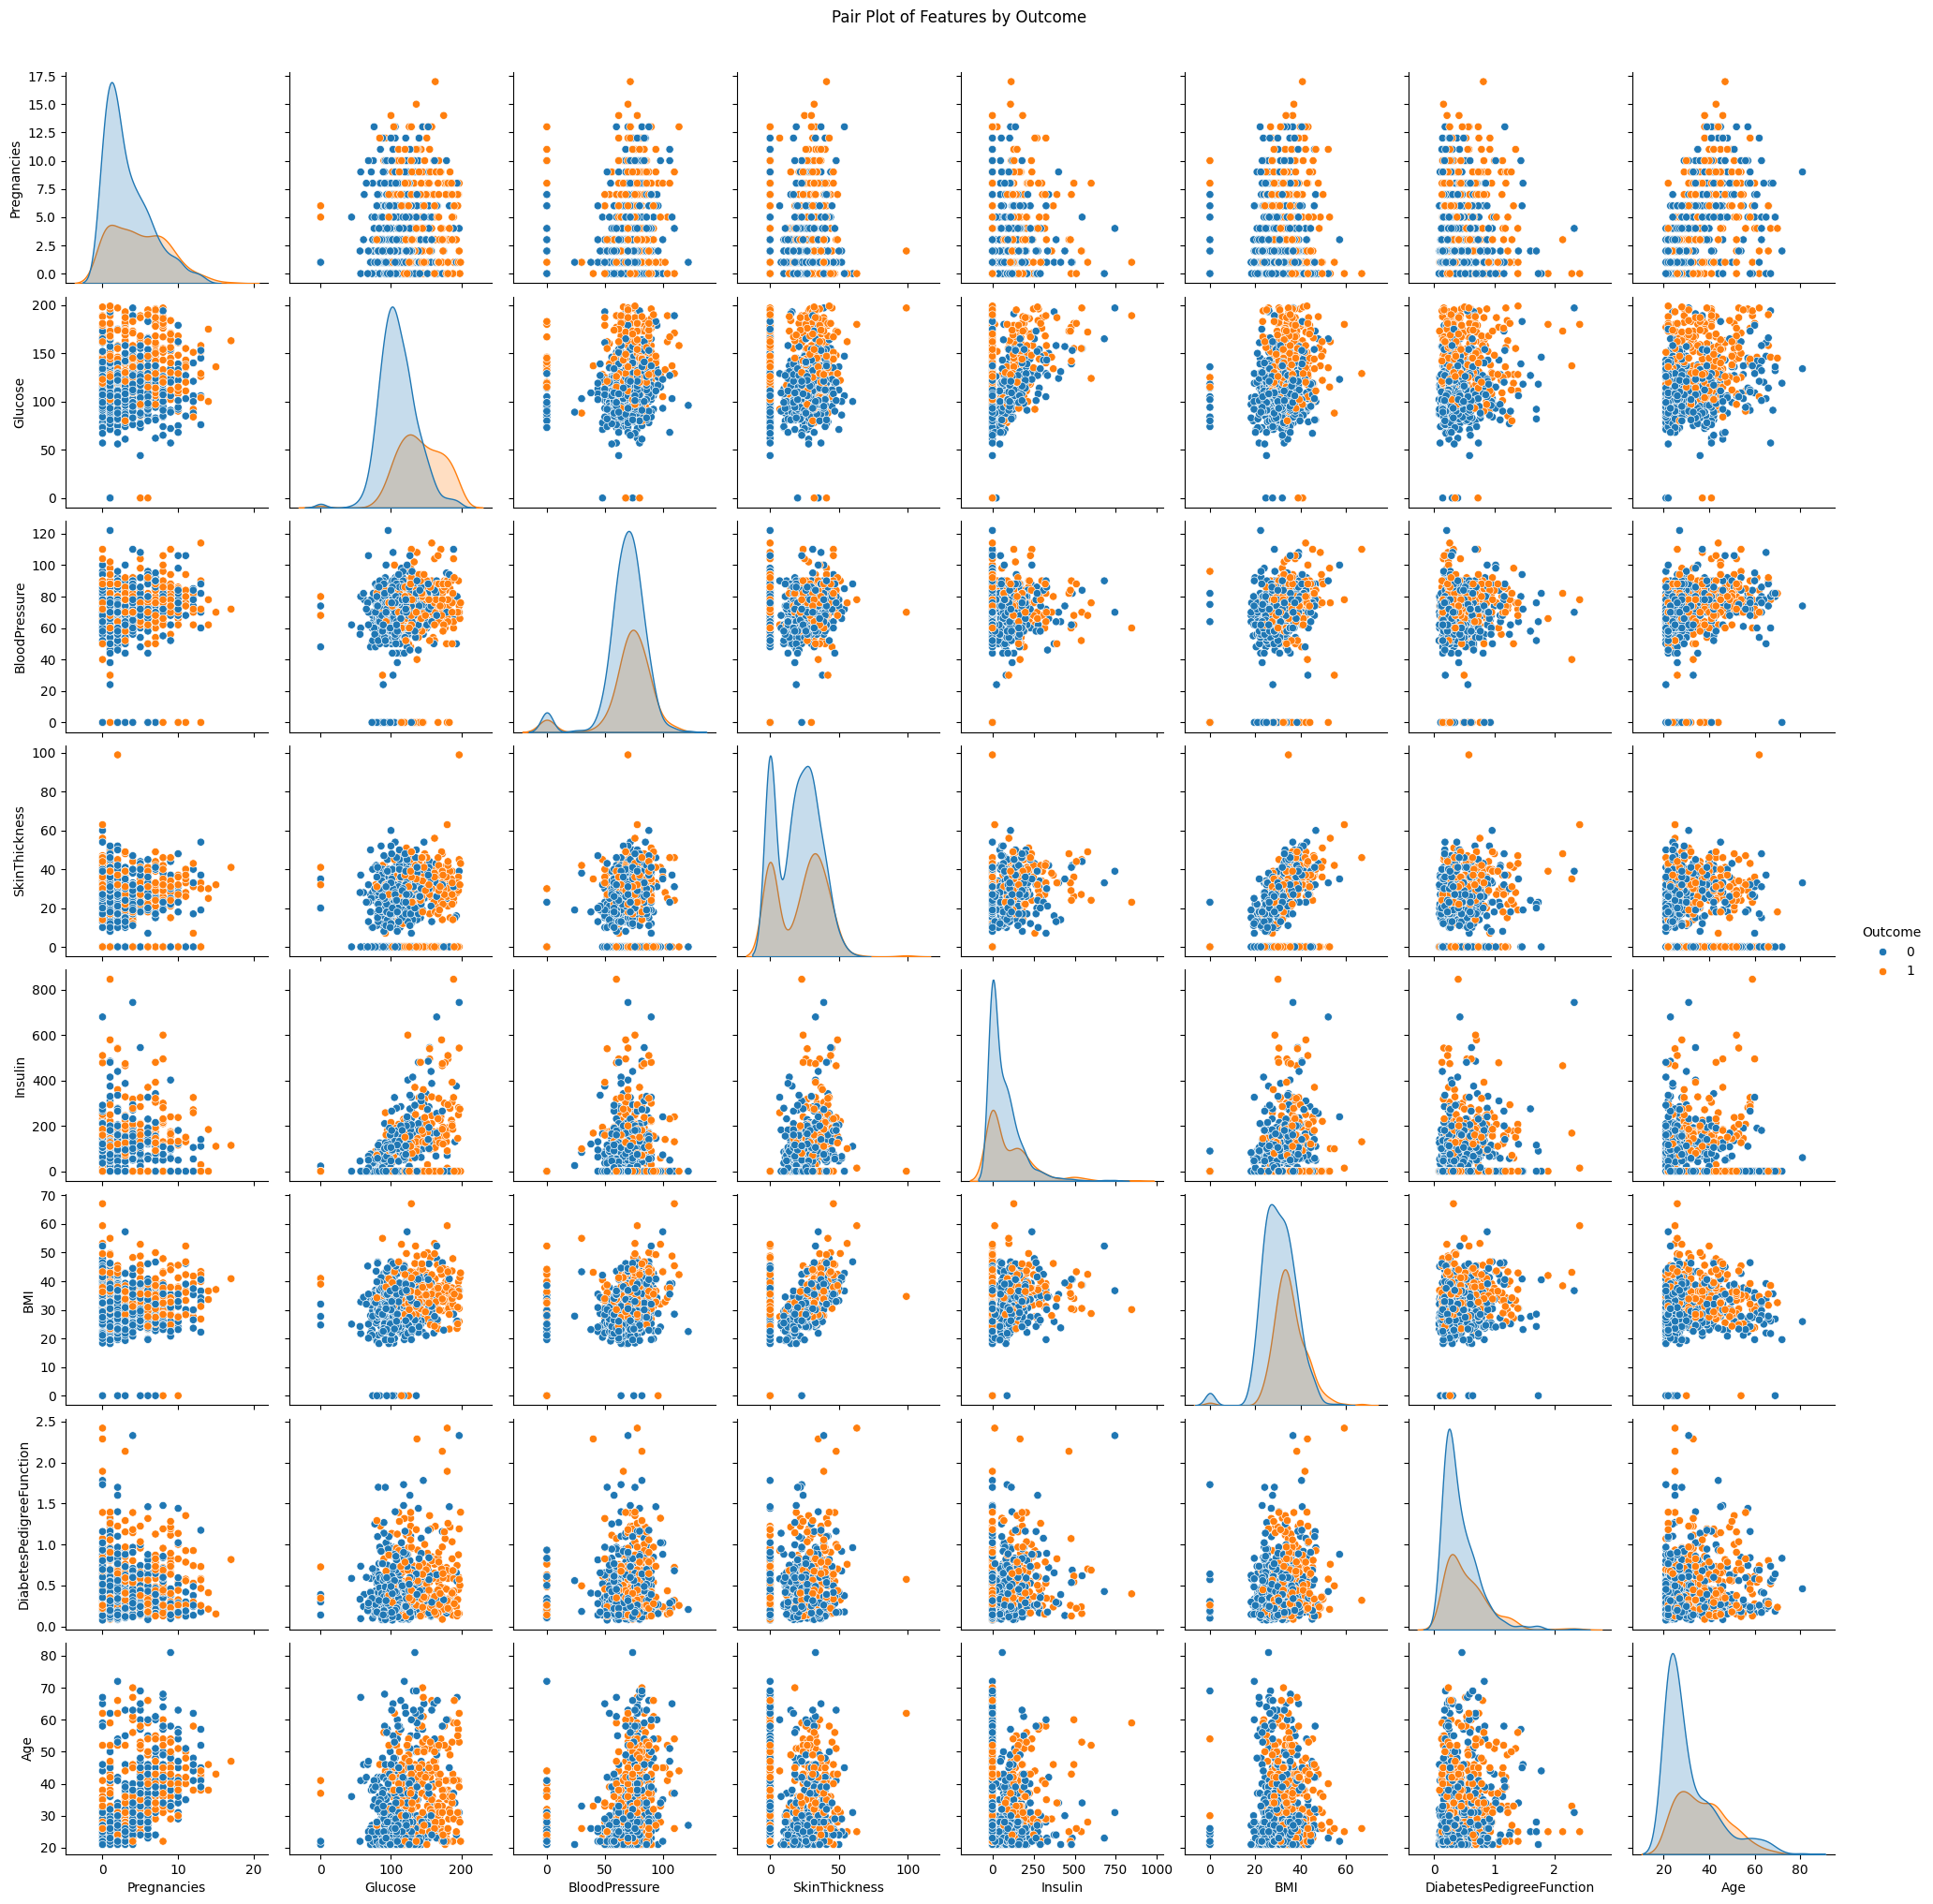

Pair plot of features by Outcome displayed.


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot to visualize relationships between features, colored by 'Outcome'
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle('Pair Plot of Features by Outcome', y=1.02) # Adjust title position
plt.show()
print("Pair plot of features by Outcome displayed.")

## Preprocess Data

### Subtask:
Handle physiologically implausible zero values in numerical features by replacing them with NaN and then imputing these missing values. Check for and handle any categorical variables if they exist.


### Identify and Handle Implausible Zero Values

Based on the subtask instructions, several columns contain '0' values that are physiologically implausible and need to be treated as missing data. These columns are 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI'. The next step is to replace these '0' values with numpy.nan to accurately represent missing data, which will then be imputed.


Following the identification of columns with physiologically implausible zero values, the next step is to programmatically replace these '0' values with numpy.nan to accurately mark them as missing. This prepares the data for proper imputation.



In [6]:
import numpy as np

# Columns with physiologically implausible zero values
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 values with NaN in the identified columns
for col in columns_to_impute:
    df[col] = df[col].replace(0, np.nan)

print(f"Replaced 0 with NaN in columns: {columns_to_impute}")
print("\nFirst 5 rows after replacing 0s with NaN:")
print(df[columns_to_impute].head())

print("\nMissing values count after replacement:")
print(df[columns_to_impute].isnull().sum())

Replaced 0 with NaN in columns: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

First 5 rows after replacing 0s with NaN:
   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0    148.0           72.0           35.0      NaN  33.6
1     85.0           66.0           29.0      NaN  26.6
2    183.0           64.0            NaN      NaN  23.3
3     89.0           66.0           23.0     94.0  28.1
4    137.0           40.0           35.0    168.0  43.1

Missing values count after replacement:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


Now that the physiologically implausible zero values have been replaced with NaN, the next step, as per the instructions, is to impute these missing values using the median of each respective column. This will prepare the dataset for further analysis and model building.



In [7]:
import warnings
warnings.filterwarnings("ignore")

# Impute missing values with the median of each respective column
for col in columns_to_impute:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print(f"Imputed missing values in columns: {columns_to_impute} with their respective medians.")

print("\nMissing values count after imputation:")
print(df[columns_to_impute].isnull().sum())

print("\nDescriptive Statistics after imputation (first 5 rows of df):")
print(df[columns_to_impute].head())

print("\nChecking for 0 values in imputed columns after imputation:")
for col in columns_to_impute:
    zero_count = (df[col] == 0).sum()
    if zero_count > 0:
        print(f"Column '{col}' still contains {zero_count} zero values.")
    else:
        print(f"Column '{col}' has no zero values.")

Imputed missing values in columns: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] with their respective medians.

Missing values count after imputation:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

Descriptive Statistics after imputation (first 5 rows of df):
   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0    148.0           72.0           35.0    125.0  33.6
1     85.0           66.0           29.0    125.0  26.6
2    183.0           64.0           29.0    125.0  23.3
3     89.0           66.0           23.0     94.0  28.1
4    137.0           40.0           35.0    168.0  43.1

Checking for 0 values in imputed columns after imputation:
Column 'Glucose' has no zero values.
Column 'BloodPressure' has no zero values.
Column 'SkinThickness' has no zero values.
Column 'Insulin' has no zero values.
Column 'BMI' has no zero values.


The previous code block produced a FutureWarning due to the use of inplace=True with chained assignment. To address this and ensure future compatibility, the fillna operation will be performed by reassigning the result back to the DataFrame column without using inplace=True.



In [8]:
for col in columns_to_impute:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

print(f"Imputed missing values in columns: {columns_to_impute} with their respective medians.")

print("\nMissing values count after imputation:")
print(df[columns_to_impute].isnull().sum())

print("\nDescriptive Statistics after imputation (first 5 rows of df):")
print(df[columns_to_impute].head())

print("\nChecking for 0 values in imputed columns after imputation:")
for col in columns_to_impute:
    zero_count = (df[col] == 0).sum()
    if zero_count > 0:
        print(f"Column '{col}' still contains {zero_count} zero values.")
    else:
        print(f"Column '{col}' has no zero values.")

Imputed missing values in columns: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] with their respective medians.

Missing values count after imputation:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

Descriptive Statistics after imputation (first 5 rows of df):
   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0    148.0           72.0           35.0    125.0  33.6
1     85.0           66.0           29.0    125.0  26.6
2    183.0           64.0           29.0    125.0  23.3
3     89.0           66.0           23.0     94.0  28.1
4    137.0           40.0           35.0    168.0  43.1

Checking for 0 values in imputed columns after imputation:
Column 'Glucose' has no zero values.
Column 'BloodPressure' has no zero values.
Column 'SkinThickness' has no zero values.
Column 'Insulin' has no zero values.
Column 'BMI' has no zero values.


## Build Logistic Regression Model

### Subtask:
Split the preprocessed data into training and testing sets. Build a logistic regression model using scikit-learn and train it on the training data.



To begin building the logistic regression model, the first step is to separate the features (X) from the target variable (y) and then split the data into training and testing sets. This is crucial for evaluating the model's performance on unseen data. After splitting, a Logistic Regression model will be instantiated and trained on the training data.



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Separate features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set (X_train) shape:", X_train.shape)
print("Testing set (X_test) shape:", X_test.shape)
print("Training target (y_train) shape:", y_train.shape)
print("Testing target (y_test) shape:", y_test.shape)

# Instantiate the Logistic Regression model
log_reg_model = LogisticRegression(solver='liblinear', random_state=42)

# Train the logistic regression model on the training data
log_reg_model.fit(X_train, y_train)

print("\nLogistic Regression model successfully trained.")

Features (X) shape: (768, 8)
Target (y) shape: (768,)

Training set (X_train) shape: (614, 8)
Testing set (X_test) shape: (154, 8)
Training target (y_train) shape: (614,)
Testing target (y_test) shape: (154,)

Logistic Regression model successfully trained.


## Evaluate Model Performance


Evaluate the trained logistic regression model on the testing data. Calculate and report performance metrics such as accuracy, precision, recall, F1-score, and ROC-AUC score. Visualize the ROC curve with appropriate legends.



The next step is to evaluate the trained logistic regression model by making predictions on the test set, calculating various performance metrics, and visualizing the ROC curve as specified in the subtask instructions.



Model Performance Metrics:
Accuracy: 0.7792
Precision: 0.7333
Recall: 0.6000
F1-Score: 0.6600
ROC-AUC Score: 0.8152


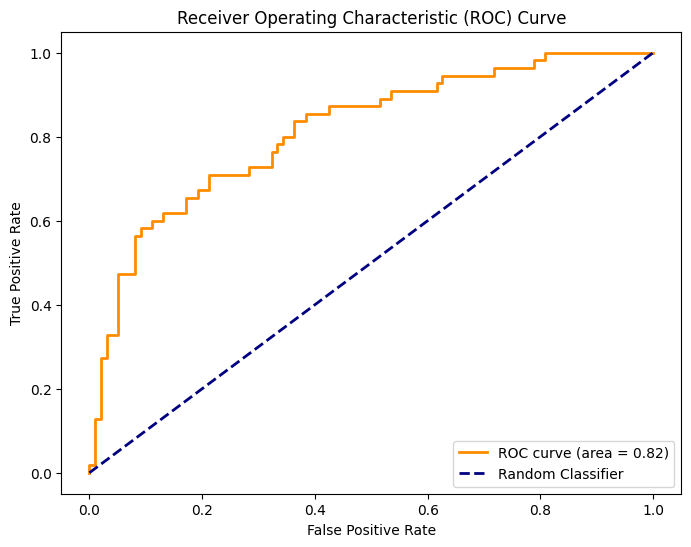

ROC curve displayed.


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Use the trained logistic regression model to make predictions on the test set
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

# 2. and 3. Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# 4. Print all calculated performance metrics
print(f"Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 5. Generate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 6. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# 7. Add title and labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# 8. Add legend
plt.legend(loc='lower right')

# 9. Display the plot
plt.show()
print("ROC curve displayed.")

## Interpret Model Results

Interpret the coefficients of the logistic regression model to understand the impact and significance of each feature in predicting the target variable.



To interpret the logistic regression model, the coefficients and intercept are needed. These can be accessed from the trained model and then organized into a DataFrame for clear presentation and understanding.



In [11]:
import pandas as pd
import numpy as np

# 1. Access the coef_ attribute of the log_reg_model
coefficients = log_reg_model.coef_[0]

# 2. Access the intercept_ attribute of the log_reg_model
intercept = log_reg_model.intercept_[0]

# Get feature names from the training data
feature_names = X_train.columns

# 3. Create a pandas DataFrame to display the feature names alongside their coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Add the intercept to the DataFrame
coef_df.loc[len(coef_df)] = ['Intercept', intercept]

# 4. Print the DataFrame containing the coefficients and the intercept
print("Logistic Regression Coefficients and Intercept:")
print(coef_df)

# Optionally, calculate odds ratios for a more intuitive understanding
coef_df['Odds_Ratio'] = np.exp(coef_df['Coefficient'])
print("\nLogistic Regression Coefficients and Odds Ratios:")
print(coef_df)

Logistic Regression Coefficients and Intercept:
                    Feature  Coefficient
0               Pregnancies     0.070937
1                   Glucose     0.029174
2             BloodPressure    -0.030231
3             SkinThickness     0.000306
4                   Insulin    -0.001105
5                       BMI     0.070566
6  DiabetesPedigreeFunction     0.398647
7                       Age     0.025989
8                 Intercept    -5.543751

Logistic Regression Coefficients and Odds Ratios:
                    Feature  Coefficient  Odds_Ratio
0               Pregnancies     0.070937    1.073513
1                   Glucose     0.029174    1.029604
2             BloodPressure    -0.030231    0.970221
3             SkinThickness     0.000306    1.000306
4                   Insulin    -0.001105    0.998896
5                       BMI     0.070566    1.073115
6  DiabetesPedigreeFunction     0.398647    1.489807
7                       Age     0.025989    1.026329
8             

### Interpretation of Logistic Regression Coefficients

Logistic regression coefficients indicate the change in the *log-odds* of the target variable for a one-unit increase in the predictor variable, holding all other predictors constant.

*   **Positive Coefficients**: A positive coefficient (e.g., Pregnancies, Glucose, BMI, DiabetesPedigreeFunction, Age) indicates that as the feature value increases, the log-odds of the `Outcome` being 1 (diabetes) increases. This means a higher value for these features is associated with an increased likelihood of having diabetes.

    *   For instance, a one-unit increase in `DiabetesPedigreeFunction` (holding other features constant) is associated with an increase of approximately 0.3986 in the log-odds of diabetes. The Odds Ratio of 1.4898 for `DiabetesPedigreeFunction` means that for every one-unit increase in this feature, the odds of having diabetes increase by about 49%.

*   **Negative Coefficients**: A negative coefficient (e.g., BloodPressure, Insulin) indicates that as the feature value increases, the log-odds of the `Outcome` being 1 (diabetes) decreases. This means a higher value for these features is associated with a decreased likelihood of having diabetes.

    *   For example, a one-unit increase in `BloodPressure` is associated with a decrease of approximately 0.0302 in the log-odds of diabetes. The Odds Ratio of 0.9702 for `BloodPressure` suggests that for every one-unit increase, the odds of having diabetes decrease by about 3%.

*   **Coefficients near zero**: Coefficients very close to zero (e.g., SkinThickness) suggest a very small impact on the log-odds of the outcome.

*   **Odds Ratios (exp(coefficient))**: To make interpretation more intuitive, coefficients can be exponentiated to get odds ratios. An odds ratio greater than 1 means an increase in the odds of the positive outcome, while an odds ratio less than 1 means a decrease. An odds ratio of 1 indicates no change in odds.

## Final Task

### Subtask:
Summarize the findings from the data exploration, model performance, and feature interpretation, providing a comprehensive overview of the analysis.


## Summary:

### Data Analysis Key Findings

*   **Data Overview**: The dataset consists of 768 entries and 9 columns, with all features being numerical.
*   **Data Quality Issues**: Initial exploration revealed physiologically implausible zero values in `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` columns, indicating potential missing data.
*   **Data Preprocessing**: These implausible zero values were successfully replaced with `NaN` and subsequently imputed using the median of their respective columns. After imputation, there were no remaining missing values or zero values in these critical columns.
*   **Model Performance**: The Logistic Regression model achieved the following performance metrics on the test set:
    *   Accuracy: 0.7792
    *   Precision: 0.7333
    *   Recall: 0.6000
    *   F1-Score: 0.6600
    *   ROC-AUC Score: 0.8152
*   **Feature Importance (from Coefficients/Odds Ratios)**:
    *   **Positive Impact**: Features like `DiabetesPedigreeFunction` (Odds Ratio: 1.4898), `Pregnancies` (Odds Ratio: 1.0735), `Glucose` (Odds Ratio: 1.0296), `BMI` (Odds Ratio: 1.0731), and `Age` (Odds Ratio: 1.0264) showed a positive association with the likelihood of diabetes. A one-unit increase in `DiabetesPedigreeFunction`, for example, increases the odds of diabetes by approximately 49%.
    *   **Negative Impact**: `BloodPressure` (Odds Ratio: 0.9702) and `Insulin` (Odds Ratio: 0.9989) had a slight negative association, meaning an increase in these features was associated with a decreased likelihood of diabetes. A one-unit increase in `BloodPressure` decreases the odds of diabetes by about 3%.
    *   **Minimal Impact**: `SkinThickness` (Odds Ratio: 1.0003) had a negligible impact on the prediction.

### Insights or Next Steps

*   The model demonstrates reasonable predictive power, with an ROC-AUC score of 0.8152, suggesting it can distinguish between diabetic and non-diabetic individuals fairly well. The recall of 0.6000 indicates that 60% of actual diabetic cases were correctly identified, which could be improved for critical medical applications.
*   Further investigation into feature engineering, particularly for `DiabetesPedigreeFunction`, `Glucose`, `BMI`, and `Age`, could potentially enhance model performance. Additionally, exploring more advanced classification algorithms or techniques to address potential class imbalance (if present) might lead to better recall without significantly sacrificing precision.


 ### Interview Questions:
1. What is the difference between precision and recall?


*   Precision measures how accurate positive predictions are, while recall measures how many actual positives were correctly identified


2. What is cross-validation, and why is it important in binary classification?


*   Cross-validation is a resampling technique where data is split into multiple folds to evaluate model stability and generalization. In binary classification, stratified cross-validation ensures class balance across folds



Model Deployment

In [39]:
import pickle

In [40]:
file='log_reg_model.pkl'
pickle.dump(log_reg_model,open(file,'wb'))

In [37]:
X.max()

,0
Pregnancies,17.00
Glucose,199.00
BloodPressure,122.00
SkinThickness,99.00
Insulin,846.00
BMI,67.10
DiabetesPedigreeFunction,2.42
Age,81.00


In [42]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1
